1-4 Importing packages with customary aliases:

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## magic command so that your plots show in the notebook without having to call plt.show() every time

5. Read in the first file and check that it imported correctly:

In [34]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv", nrows=6868)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


6. Read in the second file and check that it imported correctly:

In [39]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


7. Look at the shape of each dataframe:

In [11]:
gdp_df.shape

(6868, 4)

In [12]:
internet_df.shape

(4495, 4)

8. Look at the data types for the columns in each dataframe

In [15]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [16]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

9. Take a look at the last 10 rows of each DataFrame

In [17]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [18]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [35]:
gdp_df_v1 = gdp_df.drop(columns=['Value Footnotes'])

In [36]:
gdp_df_v1.info

<bound method DataFrame.info of      Country or Area  Year        Value
0        Afghanistan  2019  2065.036398
1        Afghanistan  2018  2033.779002
2        Afghanistan  2017  2058.383832
3        Afghanistan  2016  2057.062164
4        Afghanistan  2015  2068.265904
...              ...   ...          ...
6863        Zimbabwe  1994  3263.934978
6864        Zimbabwe  1993  3033.504852
6865        Zimbabwe  1992  3054.889178
6866        Zimbabwe  1991  3426.598094
6867        Zimbabwe  1990  3324.348171

[6868 rows x 3 columns]>

In [40]:
internet_df_v1 = internet_df.drop(columns=['Value Footnotes'])

In [41]:
internet_df_v1.info

<bound method DataFrame.info of      Country or Area  Year     Value
0        Afghanistan  2014  6.390000
1        Afghanistan  2013  5.900000
2        Afghanistan  2012  5.454545
3        Afghanistan  2011  5.000000
4        Afghanistan  2010  4.000000
...              ...   ...       ...
4490        Zimbabwe  1997  0.033080
4491        Zimbabwe  1996  0.016790
4492        Zimbabwe  1995  0.007684
4493        Zimbabwe  1994  0.001739
4494        Zimbabwe  1990  0.000000

[4495 rows x 3 columns]>

Renaming columns in each dataframe

In [43]:
gdp_df_v2 = gdp_df_v1.rename (columns=
                            {"Country or Area" : "Country",
                            "Value" : "GDP_Per_Capita"}
                            )

In [44]:
gdp_df_v2.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [46]:
internet_df_v2 = internet_df_v1.rename (columns=
                            {"Country or Area" : "Country",
                            "Value" : "Internet_Users_Pct"}
                            )

In [47]:
internet_df_v2.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

Merging the two data frames in one

In [53]:
gdp_and_internet_use = gdp_df_v2.merge(internet_df_v2, on=['Country', 'Year'], how='outer')
gdp_and_internet_use.head(6)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,6.39


In [54]:
gdp_and_internet_use.tail(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7895,Yemen,2004,NaN,0.881223
7896,Yemen,2003,NaN,0.604734
7897,Yemen,2002,NaN,0.518796
7898,Yemen,2001,NaN,0.090802
7899,Yemen,2000,NaN,0.082500
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


Filtering for the years 2004, 2009, 2014

In [60]:
gdp_and_internet_use_v1 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
gdp_and_internet_use_v1.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
33,Albania,2004,7604.838002,2.420388
53,Algeria,2014,11512.705405,18.090000
58,Algeria,2009,10782.361398,11.230000
63,Algeria,2004,10058.435939,4.634475
83,Angola,2014,8239.828837,21.260000


Three separate data frames for each year:

In [66]:
v1_2004_gdp_internet = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Year"].isin([2004])]
v1_2009_gdp_internet = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Year"].isin([2009])]
v1_2014_gdp_internet = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Year"].isin([2014])]

Finding the highest and lowest percentage of internet use in 2014

In [67]:
v1_2014_gdp_internet.loc[v1_2014_gdp_internet['Internet_Users_Pct'].idxmax()]

Country                  Iceland
Year                        2014
GDP_Per_Capita        49652.1495
Internet_Users_Pct         98.16
Name: 2625, dtype: object

In [68]:
v1_2014_gdp_internet.loc[v1_2014_gdp_internet['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 7079, dtype: object

Finding the highest and lowest percentage of internet use in 2004

In [69]:
v1_2004_gdp_internet.loc[v1_2004_gdp_internet['Internet_Users_Pct'].idxmax()]

Country                     Sweden
Year                          2004
GDP_Per_Capita        44496.023401
Internet_Users_Pct           83.89
Name: 6019, dtype: object

In [70]:
v1_2004_gdp_internet.loc[v1_2004_gdp_internet['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 7088, dtype: object

Finding the highest and lowest percentage of internet use in 2009

In [71]:
v1_2009_gdp_internet.loc[v1_2009_gdp_internet['Internet_Users_Pct'].idxmax()]

Country                    Iceland
Year                          2009
GDP_Per_Capita        48177.084123
Internet_Users_Pct            93.0
Name: 2630, dtype: object

In [72]:
v1_2009_gdp_internet.loc[v1_2009_gdp_internet['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 7083, dtype: object

Country with the highest GDP per capita in 2014

In [73]:
v1_2014_gdp_internet.loc[v1_2014_gdp_internet['GDP_Per_Capita'].idxmax()]

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita            156514.13385
Internet_Users_Pct                 NaN
Name: 3721, dtype: object

In [74]:
v1_2014_gdp_internet.loc[v1_2014_gdp_internet['GDP_Per_Capita'].idxmin()]

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                      822.610458
Internet_Users_Pct                         NaN
Name: 1047, dtype: object

Scatter plots to show Internet users vs. GDP Per Capita

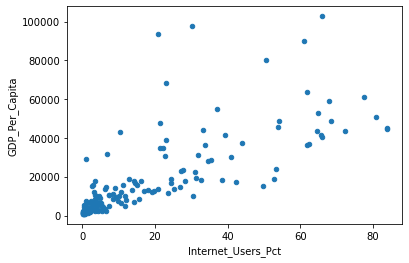

In [77]:
plt_2004 = v1_2004_gdp_internet.plot.scatter(x='Internet_Users_Pct',
                                             y='GDP_Per_Capita')

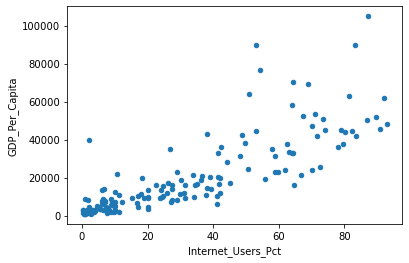

In [78]:
plt_2009 = v1_2009_gdp_internet.plot.scatter(x='Internet_Users_Pct',
                                             y='GDP_Per_Capita')

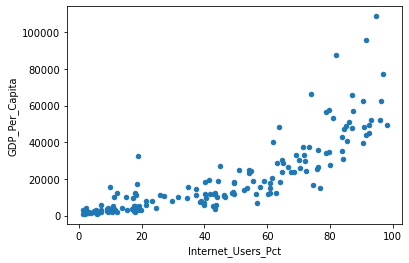

In [79]:
plt_2014 = v1_2014_gdp_internet.plot.scatter(x='Internet_Users_Pct',
                                             y='GDP_Per_Capita')

Observations: It's more likely that a country will have a higher percentage of interner users if their GDP is high, but the biggest factor seems to be time - with time, most countries have increased the percentage of internet users regardless of GDP.

Distribution of data for 2014

array([[<AxesSubplot:title={'center':'Internet_Users_Pct'}>]],
      dtype=object)

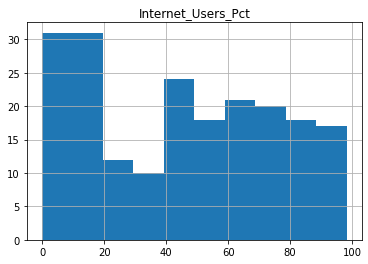

In [111]:
v1_2014_gdp_internet.hist('Internet_Users_Pct')

I don't know what that means

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

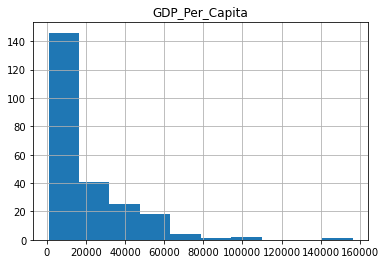

In [112]:
v1_2014_gdp_internet.hist('GDP_Per_Capita')

In [93]:
v1_2014_gdp_internet.nlargest(5, 'Internet_Users_Pct')['Country']

2625    Iceland
561     Bermuda
4648     Norway
1452    Denmark
6871    Andorra
Name: Country, dtype: object

In [123]:
gdp_and_internet_use_v1 = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra'])]

country_list = ['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']
v1_2004_top5 = v1_2004_gdp_internet[v1_2004_gdp_internet['Country'].isin(country_list)]
v1_2009_top5 = v1_2009_gdp_internet[v1_2009_gdp_internet['Country'].isin(country_list)]
v1_2014_top5 = v1_2014_gdp_internet[v1_2014_gdp_internet['Country'].isin(country_list)]

top_5_internet = pd.concat([v1_2004_top5, v1_2009_top5, v1_2014_top5])

In [124]:
gdp_and_internet_use.shape

(7905, 4)

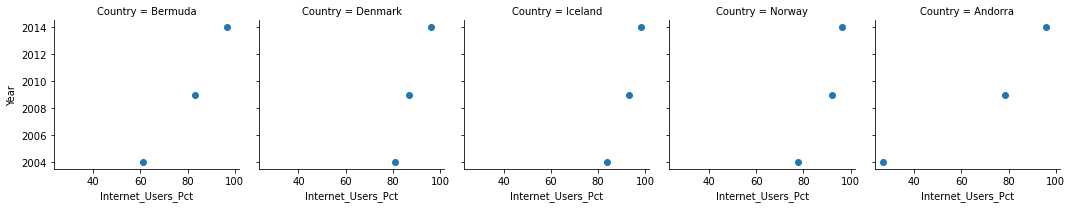

In [119]:
graph = sns.FacetGrid(top_5_internet, col="Country")
graph.map(plt.scatter, "Internet_Users_Pct", "Year")

lowest internet usage

In [104]:
v1_2014_gdp_internet.nsmallest(5, 'Internet_Users_Pct')['Country']

7079    Dem. People's Rep. of Korea
7137                        Eritrea
6219                    Timor-Leste
827                         Burundi
7674                        Somalia
Name: Country, dtype: object

In [106]:
country_list = ["Dem. People's Rep. of Korea", 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia']
v1_2004_low5 = v1_2004_gdp_internet[v1_2004_gdp_internet['Country'].isin(country_list)]
v1_2009_low5 = v1_2009_gdp_internet[v1_2009_gdp_internet['Country'].isin(country_list)]
v1_2014_low5 = v1_2014_gdp_internet[v1_2014_gdp_internet['Country'].isin(country_list)]

In [120]:
low_5_internet = pd.concat([v1_2004_low5, v1_2009_low5, v1_2014_low5])

ValueError: Invalid RGBA argument: 0.4666666666666667

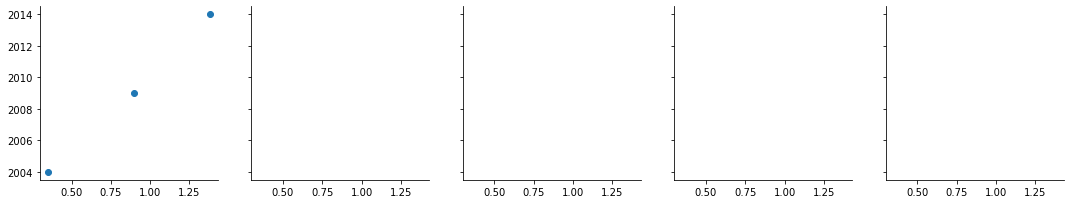

In [122]:
graph = sns.FacetGrid(low_5_internet, col="Country")
graph.map(plt.scatter, "Internet_Users_Pct", "Year")

In [108]:
v1_2014_gdp_internet.nlargest(5, 'GDP_Per_Capita')['Country']

3721    Macao SAR, China
3691          Luxembourg
5138               Qatar
5464           Singapore
561              Bermuda
Name: Country, dtype: object

In [109]:
v1_2014_gdp_internet.nsmallest(5, 'GDP_Per_Capita')['Country']

1047    Central African Republic
827                      Burundi
3781                      Malawi
1422             Dem. Rep. Congo
4528                       Niger
Name: Country, dtype: object